In [1]:
import numpy as np
import matplotlib.pyplot as plt
from animator import animate_Clusters
from DataSetGen import generate_cluster_data, load_fund_data_as_numpy
from ReinforcementClustering import reinforcement_clustering
import pickle

# For Clustering

In [2]:
# # Example synthetic data

# N = 100 # number of nodes
# K = 4 # number of clusters
# P = 0.1 # cluster varience

# X = generate_cluster_data(N, K, P, random_seed=1)


# For Funding Data

In [3]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# X = load_fund_data_as_numpy('StrategicMutualFunds.xlsx')
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)
# print(X_pca.shape)

# D_31.txt

In [4]:
# X = np.loadtxt("D31.txt")[:,:2]
# plt.scatter(X[:,0],X[:,1])

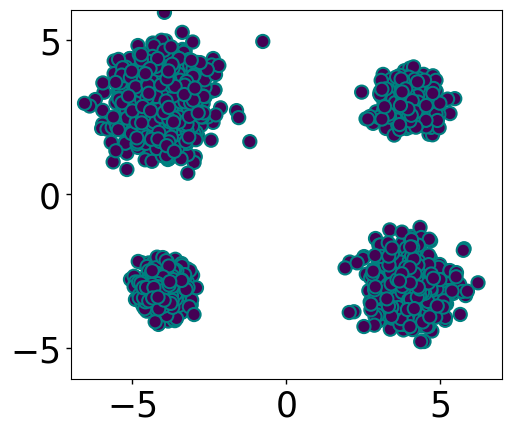

In [5]:
from TestCaseGenerator import data_RLClustering
X, K, T_P, N, d = data_RLClustering(4)

In [6]:

beta_min = 0.01
beta_max = 20
tau = 1.5

pi_star_list, Y_list = reinforcement_clustering(
    beta_min, beta_max, tau, K, X, T_P, episodes=50
)
Y_final = Y_list[-1]
pi_star = pi_star_list[-1]

Beta: 0.010
Beta: 0.015
Beta: 0.022
Beta: 0.034
Beta: 0.051
Beta: 0.076
Beta: 0.114
Beta: 0.171
Beta: 0.256
Beta: 0.384
Beta: 0.577
Beta: 0.865
Beta: 1.297
Beta: 1.946
Beta: 2.919
Beta: 4.379
Beta: 6.568
Beta: 9.853
Beta: 14.779


# Plotting The Results

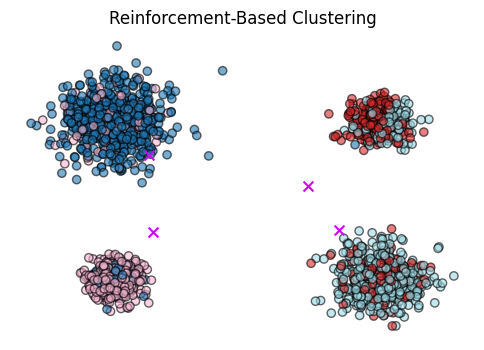

In [8]:
plt.figure(figsize=(6, 4), facecolor="#FFFFFF", edgecolor="#000000")
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=pi_star,
    cmap="tab20",
    marker="o",
    edgecolors="black",
    alpha=0.6,
    label="Data points",
)
plt.scatter(
    Y_final[:, 0], Y_final[:, 1], c="#ce04fb", marker="x", s=50, label="Centroids"
)
plt.title("Reinforcement-Based Clustering")
plt.axis("off")
plt.show()

# Save Data

In [ ]:
# with open('Y_list.pkl', 'wb') as f:
#     pickle.dump(Y_list, f)
# with open('pi_star_list.pkl', 'wb') as f:
#     pickle.dump(pi_star_list, f)

# Load Data

In [2]:
with open('Y_list.pkl', 'rb') as f:
    Y_list = pickle.load(f)
with open('pi_star_list.pkl', 'rb') as f:
    pi_star_list = pickle.load(f)
    
    

In [6]:
animate_Clusters(X, Y_list, pi_star_list, interval=500)